In [1]:
import numpy as np
import pandas as pd
import wrds
import datetime as dt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("/Users/dhruvishah/Desktop/Quant_Fin/SEM 2/Dissertation/final_data/outsamp_headlines.csv")
df.returns = df.returns/3
df

,week,FROM,TO,headline,clean_headline,returns,tf-idf,sentiment,sent_score,compname
0,1,04/01/16,22/01/16,kinem enter strateg proteom biomark discoveri ...,kinem enter strateg proteom biomark discoveri ...,-1.621247,3.253156,positive,1,PFE
1,1,04/01/16,22/01/16,corpor present jpmorgan annual healthcar confe...,corpor present jpmorgan annual healthcar confe...,0.347941,0.000000,neutral,0,SYK
2,1,04/01/16,22/01/16,eli lilli compani present jpmorgan annual heal...,eli lilli compani present jpmorgan annual heal...,-0.704184,0.000000,neutral,0,LLY
3,1,04/01/16,22/01/16,sach associ ltd annual cancer biopartn invest ...,sach associ ltd annual cancer biopartn invest ...,-2.127243,-0.742992,negative,2,BMY
4,1,04/01/16,22/01/16,sach associ ltd annual european life scienc ce...,sach associ ltd annual european life scienc ce...,-0.264329,0.372423,positive,1,GSK
...,...,...,...,...,...,...,...,...,...,...
7255,363,12/12/22,30/12/22,cv corpor earn call feb.hmg strategi llc centr...,cv corpor earn call feb hmg strategi llc centr...,-2.774265,3.403083,positive,1,CVS
7256,363,12/12/22,30/12/22,berkeley light nasdaqgsbl announc definit agre...,berkeley light nasdaqgsbl announc definit agre...,-0.454343,0.000000,neutral,0,DHR
7257,363,12/12/22,30/12/22,gsk plc announc new global headquart central l...,gsk plc announc new global headquart central l...,-0.769113,2.055391,positive,1,GSK
7258,363,12/12/22,30/12/22,bristol myer squibb announc first disclosur ne...,bristol myer squibb announc first disclosur ne...,-2.909204,1.042762,positive,1,BMY


In [3]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,week,FROM,TO,headline,clean_headline,returns,tf-idf,sentiment,sent_score,compname
0,1,04/01/16,22/01/16,kinem enter strateg proteom biomark discoveri ...,kinem enter strateg proteom biomark discoveri ...,-1.621247,3.253156,positive,1,PFE
1,1,04/01/16,22/01/16,corpor present jpmorgan annual healthcar confe...,corpor present jpmorgan annual healthcar confe...,0.347941,0.000000,neutral,0,SYK
2,1,04/01/16,22/01/16,eli lilli compani present jpmorgan annual heal...,eli lilli compani present jpmorgan annual heal...,-0.704184,0.000000,neutral,0,LLY
3,1,04/01/16,22/01/16,sach associ ltd annual cancer biopartn invest ...,sach associ ltd annual cancer biopartn invest ...,-2.127243,-0.742992,negative,2,BMY
4,1,04/01/16,22/01/16,sach associ ltd annual european life scienc ce...,sach associ ltd annual european life scienc ce...,-0.264329,0.372423,positive,1,GSK
...,...,...,...,...,...,...,...,...,...,...
7125,363,12/12/22,30/12/22,cv corpor earn call feb.hmg strategi llc centr...,cv corpor earn call feb hmg strategi llc centr...,-2.774265,3.403083,positive,1,CVS
7126,363,12/12/22,30/12/22,berkeley light nasdaqgsbl announc definit agre...,berkeley light nasdaqgsbl announc definit agre...,-0.454343,0.000000,neutral,0,DHR
7127,363,12/12/22,30/12/22,gsk plc announc new global headquart central l...,gsk plc announc new global headquart central l...,-0.769113,2.055391,positive,1,GSK
7128,363,12/12/22,30/12/22,bristol myer squibb announc first disclosur ne...,bristol myer squibb announc first disclosur ne...,-2.909204,1.042762,positive,1,BMY


In [4]:
ticks = df.compname.unique().tolist()
weeks = df.week.unique().tolist()

In [5]:
mktcap = pd.read_csv("/Users/dhruvishah/Desktop/Quant_Fin/SEM 2/Dissertation/mktcap2016.csv")
mktcap.sort_values(by="Market Capitalization", inplace=True, ascending=False)
mktcap = mktcap.loc[mktcap['Ticker Name'].isin(ticks)]
mktcap.reset_index(drop=True, inplace=True)

In [6]:
df

,week,FROM,TO,headline,clean_headline,returns,tf-idf,sentiment,sent_score,compname
0,1,04/01/16,22/01/16,kinem enter strateg proteom biomark discoveri ...,kinem enter strateg proteom biomark discoveri ...,-1.621247,3.253156,positive,1,PFE
1,1,04/01/16,22/01/16,corpor present jpmorgan annual healthcar confe...,corpor present jpmorgan annual healthcar confe...,0.347941,0.000000,neutral,0,SYK
2,1,04/01/16,22/01/16,eli lilli compani present jpmorgan annual heal...,eli lilli compani present jpmorgan annual heal...,-0.704184,0.000000,neutral,0,LLY
3,1,04/01/16,22/01/16,sach associ ltd annual cancer biopartn invest ...,sach associ ltd annual cancer biopartn invest ...,-2.127243,-0.742992,negative,2,BMY
4,1,04/01/16,22/01/16,sach associ ltd annual european life scienc ce...,sach associ ltd annual european life scienc ce...,-0.264329,0.372423,positive,1,GSK
...,...,...,...,...,...,...,...,...,...,...
7125,363,12/12/22,30/12/22,cv corpor earn call feb.hmg strategi llc centr...,cv corpor earn call feb hmg strategi llc centr...,-2.774265,3.403083,positive,1,CVS
7126,363,12/12/22,30/12/22,berkeley light nasdaqgsbl announc definit agre...,berkeley light nasdaqgsbl announc definit agre...,-0.454343,0.000000,neutral,0,DHR
7127,363,12/12/22,30/12/22,gsk plc announc new global headquart central l...,gsk plc announc new global headquart central l...,-0.769113,2.055391,positive,1,GSK
7128,363,12/12/22,30/12/22,bristol myer squibb announc first disclosur ne...,bristol myer squibb announc first disclosur ne...,-2.909204,1.042762,positive,1,BMY


In [7]:
cap = mktcap['Market Capitalization'].sum()
for i in range(len(mktcap["Ticker Name"])):
#     temp = df[df.compname==i]
#     temp.loc['']
#     df.loc[df.compname==mktcap["Ticker Name"][i], 'vw'] = mktcap['Market Capitalisation'][i]/cap
    df.loc[df.compname==mktcap["Ticker Name"][i], 'mkt_cap'] = mktcap['Market Capitalization'][i]

In [8]:
df_pos = df[df.sentiment=="positive"]
df_neg = df[df.sentiment=="negative"]
df_pos['Rank'] = df_pos.groupby(['week'])['tf-idf'].rank(method='first', ascending=False)
df_neg['Rank'] = df_neg.groupby(['week'])['tf-idf'].rank(method='first', ascending=False)
# df_pos['Rank_lm'] = df_pos.groupby(['week', 'sentiment'])['tf-idf'].rank(method='first', ascending=False)
# df_neg['Rank_lm'] = df_neg.groupby(['week', 'sentiment'])['tf-idf'].rank(method='first', ascending=False)

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39321/939779148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['Rank'] = df_pos.groupby(['week'])['tf-idf'].rank(method='first', ascending=False)
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39321/939779148.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg['Rank'] = df_neg.groupby(['week'])['tf-idf'].rank(method='first', ascending=False)


In [9]:
mktcap['Market Capitalization'].sum()

1786551310.65

In [10]:
def get_portfolio_long_ew(frame):
    ret = [0]
    cum_ret = 1
    for i in weeks[1:]:
        temp = frame[frame.week == i]
        stock = max(temp.Rank) - 4
        mid_df = temp[temp.Rank >= stock]
        if len(mid_df) > 5:
            idx = 5-len(mid_df)
            mid_df = mid_df[:idx]
        weights = 1/len(mid_df)
        returns = sum(mid_df.returns*weights)
        cum_ret = returns
        ret.append(cum_ret) 
    return ret 

# fig = plt.figure()
# ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
# ax1.plot(get_portfolio_long_ew(df_pos))
# ax1.set_xlabel('Date')
# ax1.set_ylabel("Cumulative Returns")
# ax1.set_title("Long Portfolio Cumulative Returns")
# plt.show()

In [11]:
def get_portfolio_short_ew(frame):
    ret = [0]
    cum_ret = 0
    for i in weeks[1:]:
        temp = frame[frame.week == i]
#         stock = min(temp.Rank) - 4
        mid_df = temp[temp.Rank <= 5]
        if len(mid_df) > 5:
            idx = 5-len(mid_df)
            mid_df = mid_df[:idx]
        weights = 1/len(mid_df)
        returns = sum(mid_df.returns*weights)
        cum_ret = returns
        ret.append(cum_ret) 
    return ret 

In [12]:
def get_portfolio_long_vw(frame):
    ret = [0]
    cum_ret = 1
    for i in weeks[1:]:
        temp = frame[frame.week == i]
        stock = max(temp.Rank) - 4
        mid_df = temp[temp.Rank >= stock]
        if len(mid_df) > 5:
            idx = 5-len(mid_df)
            mid_df = mid_df[:idx]
        cap_sum = sum(mid_df.mkt_cap)
        weights = mid_df.mkt_cap/cap_sum
        returns = sum(mid_df.returns*weights)
#         returns = sum(mid_df.returns*mid_df.vw)
        cum_ret = returns
        ret.append(cum_ret) 
    return ret 

In [13]:
def get_portfolio_short_vw(frame):
    ret = [0]
    cum_ret = 0
    for i in weeks[1:]:
        temp = frame[frame.week == i]
#         stock = min(temp.Rank) - 4
        mid_df = temp[temp.Rank <= 5]
        if len(mid_df) > 5:
            idx = 5-len(mid_df)
            mid_df = mid_df[:idx]
        cap_sum = sum(mid_df.mkt_cap)
        weights = mid_df.mkt_cap/cap_sum
        returns = sum(mid_df.returns*weights)
#         returns = sum(mid_df.returns*mid_df.vw)
        cum_ret = returns
        ret.append(cum_ret)
    return ret

In [14]:
def get_portfolio_ls_vw(frame):
    ret = [0]
    cum_ret = 0
    for i in weeks[1:]:
        temp = frame[frame.week == i]
#         stock = min(temp.Rank) - 4
        temp[''] = np.where(df_signal[ticker] < 22, -1, 1)
        mid_df = temp[temp.Rank <= 5]
        cap_sum = sum(mid_df.mkt_cap)
        weights = mid_df.mkt_cap/cap_sum
        returns = sum(mid_df.returns*weights)
#         returns = sum(mid_df.returns*mid_df.vw)
        cum_ret = returns
        ret.append(cum_ret)
    return ret

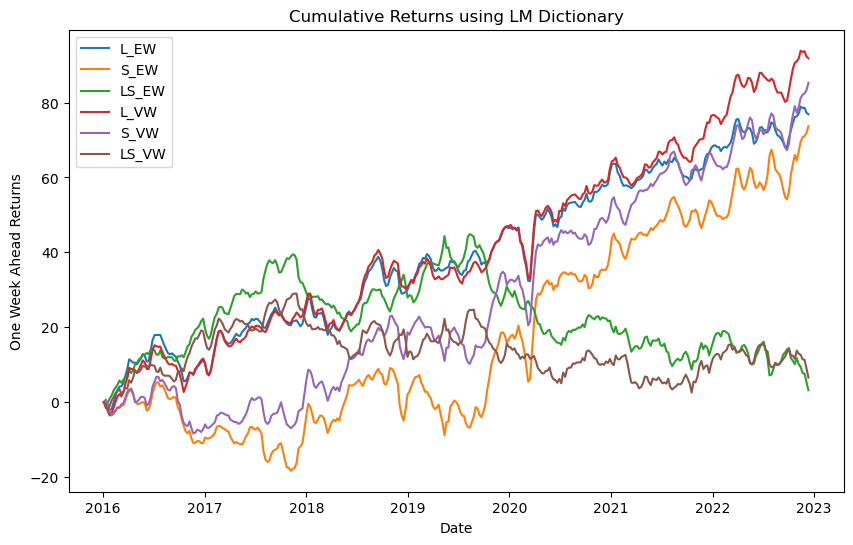

In [15]:
df['FROM'] = pd.to_datetime(df['FROM'], format='%d/%m/%y')
l_ew = pd.Series(get_portfolio_long_ew(df_pos))
s_ew = pd.Series(get_portfolio_short_ew(df_neg))
ls_ew = l_ew+(-1*s_ew)
l_vw = pd.Series(get_portfolio_long_vw(df_pos))
s_vw = pd.Series(get_portfolio_short_vw(df_neg))
ls_vw = l_vw+(-1*s_vw)
yrs = pd.DatetimeIndex(df['FROM']).unique().tolist()
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the lines
plt.plot(yrs, np.cumsum(l_ew), label='L_EW')
plt.plot(yrs, np.cumsum(s_ew), label='S_EW')
plt.plot(yrs, np.cumsum(ls_ew), label='LS_EW')
plt.plot(yrs, np.cumsum(l_vw), label='L_VW')
plt.plot(yrs, np.cumsum(s_vw), label='S_VW')
plt.plot(yrs, np.cumsum(ls_vw), label='LS_VW')
plt.xlabel('Date')  # Replace with your actual x-axis label
plt.ylabel('One Week Ahead Returns')
plt.title('Cumulative Returns using LM Dictionary')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [16]:
port_vals = pd.DataFrame(columns=['avg', 'stdev', 'std_downside', 'sharpe_ratio', 'sortino_ratio','ff3_alpha', 'ff3_r2', 'ff5_alpha', 'ff5_r2'])

avg = [np.mean(l_ew)] + [np.mean(s_ew)] + [np.mean(ls_ew)] + [np.mean(l_vw)] + [np.mean(s_vw)] + [np.mean(ls_vw)] 
stdev = [np.std(l_ew)] + [np.std(s_ew)] + [np.std(ls_ew)] + [np.std(l_vw)] + [np.std(s_vw)] + [np.std(ls_vw)]

downside = [np.std(l_ew[l_ew < 0]), np.std(s_ew[s_ew < 0]), np.std(ls_ew[ls_ew < 0]),np.std(l_vw[l_vw < 0]),
            np.std(s_vw[s_vw < 0]), np.std(ls_vw[ls_vw < 0])]
# np.std(l_ew[l_ew < 0])
# down_s_ew = np.std(s_ew[s_ew < 0])
# down_ls_ew = np.std(ls_ew[ls_ew < 0])

port_vals['avg'] = avg
port_vals['stdev'] = stdev
port_vals['std_downside'] = downside

In [17]:
new_index = ['l_ew', 's_ew', 'ls_ew', 'l_vw', 's_vw', 'ls_vw']
port_vals = port_vals.set_index(pd.Index(new_index))

In [18]:
for i in range(len(port_vals)):
    port_vals.sharpe_ratio[i]=(port_vals.avg[i]-0.008)/port_vals.stdev[i]
    port_vals.sortino_ratio[i]=(port_vals.avg[i]-0.008)/port_vals.std_downside[i]
port_vals

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39321/2852972423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.sharpe_ratio[i]=(port_vals.avg[i]-0.008)/port_vals.stdev[i]
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39321/2852972423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.sortino_ratio[i]=(port_vals.avg[i]-0.008)/port_vals.std_downside[i]


,avg,stdev,std_downside,sharpe_ratio,sortino_ratio,ff3_alpha,ff3_r2,ff5_alpha,ff5_r2
l_ew,0.211764,1.317338,0.795206,0.154679,0.25624,NaN,NaN,NaN,NaN
s_ew,0.202988,1.701008,0.972253,0.114631,0.200553,NaN,NaN,NaN,NaN
ls_ew,0.008776,1.282619,0.863411,0.000605,0.000899,NaN,NaN,NaN,NaN
l_vw,0.253002,1.367496,0.804227,0.179161,0.304643,NaN,NaN,NaN,NaN
s_vw,0.234930,1.571554,0.908364,0.144398,0.249822,NaN,NaN,NaN,NaN
ls_vw,0.018073,1.239696,0.801334,0.008125,0.01257,NaN,NaN,NaN,NaN


In [19]:
ff3 = pd.read_csv("ff3.csv")
ff3.date = pd.to_datetime(ff3['date'], format='%d/%m/%y')
ff3.set_index('date', inplace=True)

start = []
weekly_first_days = ff3.resample('W-MON').first()

weekly_first_days = weekly_first_days.dropna()

start = weekly_first_days.index.strftime('%d/%m/%y').tolist()
start_list = start[:-1]

end = []
weekly_last_days = ff3.resample('W-FRI').last()

weekly_last_days = weekly_last_days.dropna()

end_list = weekly_last_days.index.strftime('%d/%m/%y').tolist()
weekly_df = pd.DataFrame(columns=[['FROM'] +['TO']])
start_list = pd.to_datetime(start_list, format='%d/%m/%y')
end_list = pd.to_datetime(end_list, format='%d/%m/%y')
start_list = start_list.sort_values()
end_list = end_list.sort_values()

In [20]:
cols = ff3.columns.tolist()

weekly_df = pd.DataFrame(columns= cols)
for i in range(len(start_list)):
    start_date = start_list[i]
    end_date = end_list[i]
    selected_data = ff3[(ff3.index >= start_date) & (ff3.index <= end_date)]
    data = selected_data.head(1)
    weekly_df = pd.concat([weekly_df, data])
weekly_df['date'] = start_list
weekly_df

,mktrf,smb,hml,rf,umd,date
2016-01-04,-0.0159,-0.0087,0.0052,0.00000,-0.0193,2016-01-04
2016-01-11,-0.0006,-0.0064,0.0040,0.00000,0.0161,2016-01-11
2016-01-19,-0.0019,-0.0134,-0.0006,0.00000,0.0161,2016-01-18
2016-01-25,-0.0171,-0.0039,-0.0099,0.00000,0.0159,2016-01-25
2016-02-01,-0.0004,-0.0019,-0.0100,0.00001,0.0032,2016-02-01
...,...,...,...,...,...,...
2022-11-28,-0.0155,-0.0040,-0.0021,0.00014,0.0078,2022-11-28
2022-12-05,-0.0202,-0.0060,-0.0053,0.00016,0.0072,2022-12-05
2022-12-12,0.0141,-0.0032,-0.0015,0.00016,0.0006,2022-12-12
2022-12-19,-0.0101,-0.0077,0.0124,0.00016,0.0209,2022-12-19


In [21]:
weekly = weekly_df.loc[weekly_df['date'].isin(df.FROM.unique())]
weekly.reset_index(drop=True, inplace=True)
weekly

,mktrf,smb,hml,rf,umd,date
0,-0.0159,-0.0087,0.0052,0.00000,-0.0193,2016-01-04
1,-0.0006,-0.0064,0.0040,0.00000,0.0161,2016-01-11
2,-0.0019,-0.0134,-0.0006,0.00000,0.0161,2016-01-18
3,-0.0171,-0.0039,-0.0099,0.00000,0.0159,2016-01-25
4,-0.0004,-0.0019,-0.0100,0.00001,0.0032,2016-02-01
...,...,...,...,...,...,...
358,-0.0095,-0.0040,0.0025,0.00014,0.0178,2022-11-14
359,-0.0053,-0.0035,0.0099,0.00014,0.0162,2022-11-21
360,-0.0155,-0.0040,-0.0021,0.00014,0.0078,2022-11-28
361,-0.0202,-0.0060,-0.0053,0.00016,0.0072,2022-12-05


In [22]:
weekly['l_ew'] = l_ew
weekly['s_ew'] = s_ew
weekly['ls_ew'] = ls_ew
weekly['l_vw'] = l_vw
weekly['s_vw'] = s_vw
weekly['ls_vw'] = ls_vw

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39321/551659422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly['l_ew'] = l_ew
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39321/551659422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly['s_ew'] = s_ew
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39321/551659422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [23]:
import statsmodels.api as sm

ports = ['l_ew', 's_ew', 'ls_ew', 'l_vw', 's_vw', 'ls_vw']

for i in range(len(ports)):
    X = weekly[['mktrf', 'smb', 'hml','umd']]  # Independent variables
    X = sm.add_constant(X)  # Add a constant term
    y = weekly[ports[i]]  # Dependent variable
    model = sm.OLS(y, X).fit()
    port_vals.ff3_alpha[i] = model.params['const']
    port_vals.ff3_r2[i] = model.rsquared*100
port_vals

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39321/3896336128.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.ff3_alpha[i] = model.params['const']
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39321/3896336128.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.ff3_r2[i] = model.rsquared*100
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39321/3896336128.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,avg,stdev,std_downside,sharpe_ratio,sortino_ratio,ff3_alpha,ff3_r2,ff5_alpha,ff5_r2
l_ew,0.211764,1.317338,0.795206,0.154679,0.25624,0.21144,2.648412,NaN,NaN
s_ew,0.202988,1.701008,0.972253,0.114631,0.200553,0.201384,1.39141,NaN,NaN
ls_ew,0.008776,1.282619,0.863411,0.000605,0.000899,0.010055,0.191143,NaN,NaN
l_vw,0.253002,1.367496,0.804227,0.179161,0.304643,0.253426,2.341796,NaN,NaN
s_vw,0.234930,1.571554,0.908364,0.144398,0.249822,0.234735,1.295655,NaN,NaN
ls_vw,0.018073,1.239696,0.801334,0.008125,0.01257,0.018691,0.621125,NaN,NaN


In [24]:
ff5 = pd.read_csv("ff5.csv")
ff5.date = pd.to_datetime(ff5['date'], format='%d/%m/%y')
ff5.set_index('date', inplace=True)
# cols = ff3.columns.tolist()
weekly_df_ff5 = pd.DataFrame(columns= cols)
for i in range(len(start_list)):
    start_date = start_list[i]
    end_date = end_list[i]
    selected_data = ff5[(ff5.index >= start_date) & (ff5.index <= end_date)]
    data = selected_data.sum()
    data = pd.DataFrame(data).T
    weekly_df_ff5 = pd.concat([weekly_df_ff5, data])
weekly_df_ff5['date'] = start_list
weekly_ff5 = weekly_df_ff5.loc[weekly_df_ff5['date'].isin(df.FROM.unique())]
weekly_ff5.reset_index(drop=True, inplace=True)

weekly_ff5['l_ew'] = l_ew
weekly_ff5['s_ew'] = s_ew
weekly_ff5['ls_ew'] = ls_ew
weekly_ff5['l_vw'] = l_vw
weekly_ff5['s_vw'] = s_vw
weekly_ff5['ls_vw'] = ls_vw
weekly_ff5

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39321/3423993167.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_ff5['l_ew'] = l_ew
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39321/3423993167.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_ff5['s_ew'] = s_ew
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39321/3423993167.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,mktrf,smb,hml,rf,umd,rmw,cma,date,l_ew,s_ew,ls_ew,l_vw,s_vw,ls_vw
0,-0.0637,-0.0204,0.0058,0.00000,0.0141,0.0129,0.0117,2016-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.0250,-0.0136,-0.0020,0.00000,0.0253,0.0075,0.0063,2016-01-11,-0.809929,-0.039115,-0.770813,-0.900736,0.672170,-1.572906
2,0.0140,-0.0001,-0.0155,0.00000,-0.0126,0.0040,-0.0029,2016-01-18,-0.562992,-1.188321,0.625329,-1.475528,-1.164094,-0.311434
3,0.0176,-0.0029,0.0359,0.00000,-0.0160,0.0055,0.0149,2016-01-25,-0.750274,-1.868102,1.117828,-1.170270,-2.078861,0.908591
4,-0.0337,-0.0115,0.0109,0.00005,-0.0357,0.0206,0.0153,2016-02-01,0.347193,-0.475886,0.823080,0.658182,-0.770579,1.428761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,-0.0097,-0.0123,0.0078,0.00070,0.0580,0.0294,0.0219,2022-11-14,1.870421,2.619029,-0.748608,2.064984,2.424927,-0.359943
359,0.0143,-0.0056,0.0093,0.00056,0.0037,0.0027,0.0042,2022-11-21,-0.412528,1.222532,-1.635060,-0.310959,0.864343,-1.175302
360,0.0129,0.0060,-0.0250,0.00074,-0.0209,-0.0099,-0.0061,2022-11-28,0.098419,0.227225,-0.128807,0.175678,0.317163,-0.141485
361,-0.0380,-0.0135,-0.0055,0.00080,0.0093,0.0142,0.0097,2022-12-05,-1.363120,0.886541,-2.249661,-1.396943,0.875514,-2.272457


In [25]:
import statsmodels.api as sm

ports = ['l_ew', 's_ew', 'ls_ew', 'l_vw', 's_vw', 'ls_vw']

for i in range(len(ports)):
    X = weekly_ff5[['mktrf', 'smb', 'hml','umd']]  # Independent variables
    X = sm.add_constant(X)  # Add a constant term
    y = weekly_ff5[ports[i]]  # Dependent variable
    model = sm.OLS(y, X).fit()
    port_vals.ff5_alpha[i] = model.params['const']
    port_vals.ff5_r2[i] = model.rsquared*100
port_vals

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39321/149249534.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.ff5_alpha[i] = model.params['const']
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39321/149249534.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.ff5_r2[i] = model.rsquared*100
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39321/149249534.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,avg,stdev,std_downside,sharpe_ratio,sortino_ratio,ff3_alpha,ff3_r2,ff5_alpha,ff5_r2
l_ew,0.211764,1.317338,0.795206,0.154679,0.25624,0.21144,2.648412,0.169497,13.41475
s_ew,0.202988,1.701008,0.972253,0.114631,0.200553,0.201384,1.39141,0.149673,15.573385
ls_ew,0.008776,1.282619,0.863411,0.000605,0.000899,0.010055,0.191143,0.019824,3.259615
l_vw,0.253002,1.367496,0.804227,0.179161,0.304643,0.253426,2.341796,0.214077,10.264148
s_vw,0.234930,1.571554,0.908364,0.144398,0.249822,0.234735,1.295655,0.188555,13.429474
ls_vw,0.018073,1.239696,0.801334,0.008125,0.01257,0.018691,0.621125,0.025523,2.592595


In [26]:
port_final = port_vals.copy()
port_final.sharpe_ratio = port_final.sharpe_ratio*np.sqrt(52)
port_final.stdev = port_final.stdev*np.sqrt(52)
port_final.avg = (((1+port_final.avg)**(1/52))-1)*52*100
port_final.sortino_ratio = port_final.sortino_ratio*np.sqrt(52)
port_final

,avg,stdev,std_downside,sharpe_ratio,sortino_ratio,ff3_alpha,ff3_r2,ff5_alpha,ff5_r2
l_ew,19.243232,9.499459,0.795206,1.115403,1.847776,0.21144,2.648412,0.169497,13.41475
s_ew,18.513718,12.266143,0.972253,0.826614,1.446205,0.201384,1.39141,0.149673,15.573385
ls_ew,0.873853,9.249100,0.863411,0.004363,0.006482,0.010055,0.191143,0.019824,3.259615
l_vw,22.603229,9.861152,0.804227,1.29195,2.196812,0.253426,2.341796,0.214077,10.264148
s_vw,21.144265,11.332636,0.908364,1.04127,1.801494,0.234735,1.295655,0.188555,13.429474
ls_vw,1.791439,8.939574,0.801334,0.058591,0.090643,0.018691,0.621125,0.025523,2.592595


In [27]:
port_final.to_csv("LM_port_vals.csv")

In [28]:
print('l',np.cumsum(l_ew)[-1:],'\n')
print('s',np.cumsum(s_ew)[-1:],'\n')
print('ls',np.cumsum(ls_ew)[-1:],'\n')
print('l vw',np.cumsum(l_vw)[-1:],'\n')
print('s vw',np.cumsum(s_vw)[-1:],'\n')
print('ls vw',np.cumsum(ls_vw)[-1:],'\n')

l 362    76.870328
dtype: float64 

s 362    73.684609
dtype: float64 

ls 362    3.185719
dtype: float64 

l vw 362    91.839807
dtype: float64 

s vw 362    85.279428
dtype: float64 

ls vw 362    6.56038
dtype: float64 



In [33]:
l_vw = pd.DataFrame(np.cumsum(l_vw))
l_vw.to_csv('lm_lv.csv')